# III. Analysis and Visualization using Pandas and Matplotlib

## Import necessary Libraries

In [1]:
import pyodbc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## 1. Read Data from Data Warehouse

In [2]:
# Connect to the database
dw = pyodbc.connect('Driver={SQL Server};'
                      'Server=HAFIDA\SQLSERVER19;'
                      'Database=DWR;'
                      'Trusted_Connection=yes;')
# Create a cursor
cursor = dw.cursor()

In [3]:
# Read the movies table into a dataframe
movies = pd.read_sql("SELECT * FROM movies", dw)

# Read the ratings table into a dataframe
ratings = pd.read_sql("SELECT * FROM ratings", dw)

# Read the tags table into a dataframe
tags = pd.read_sql("SELECT * FROM tags", dw)

# Close the connection
dw.close()

C:\Users\hafid\AppData\Local\Temp/ipykernel_17832/2163752582.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  movies = pd.read_sql("SELECT * FROM movies", dw)
C:\Users\hafid\AppData\Local\Temp/ipykernel_17832/2163752582.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ratings = pd.read_sql("SELECT * FROM ratings", dw)
C:\Users\hafid\AppData\Local\Temp/ipykernel_17832/2163752582.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tags = pd.read_sql("SELECT * FROM tags", dw)


## 2. EDA

<h1 style='background:#6EA5C4;padding-top:1px; border:0; color:white'><center>movies</center></h1> 

### a. Check Dataframe's head and tail

In [4]:
movies.head()

,movieId,title,year,genre_count,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,imdb_url
0,1,Toy Story,1995,5,adventure,animation,children,comedy,fantasy,0,0,0,0,0,https://www.imdb.com/title/tt0114709/
1,2,Jumanji,1995,3,adventure,children,fantasy,0,0,0,0,0,0,0,https://www.imdb.com/title/tt0113497/
2,3,Grumpier Old Men,1995,2,comedy,romance,0,0,0,0,0,0,0,0,https://www.imdb.com/title/tt0113228/
3,4,Waiting to Exhale,1995,3,comedy,drama,romance,0,0,0,0,0,0,0,https://www.imdb.com/title/tt0114885/
4,5,Father of the Bride Part II,1995,1,comedy,0,0,0,0,0,0,0,0,0,https://www.imdb.com/title/tt0113041/


In [5]:
movies.tail()

,movieId,title,year,genre_count,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,imdb_url
9737,193581,Black Butler: Book of the Atlantic,2017,4,action,animation,comedy,fantasy,0,0,0,0,0,0,https://www.imdb.com/title/tt5476944/
9738,193583,No Game No Life: Zero,2017,3,animation,comedy,fantasy,0,0,0,0,0,0,0,https://www.imdb.com/title/tt5914996/
9739,193585,Flint,2017,1,drama,0,0,0,0,0,0,0,0,0,https://www.imdb.com/title/tt6397426/
9740,193587,Bungo Stray Dogs: Dead Apple,2018,2,action,animation,0,0,0,0,0,0,0,0,https://www.imdb.com/title/tt8391976/
9741,193609,Andrew Dice Clay: Dice Rules,1991,1,comedy,0,0,0,0,0,0,0,0,0,https://www.imdb.com/title/tt0101726/


### b. Descriptive Statistics

In [6]:
movies.describe()

,movieId,year,genre_count
count,9742.000000,9742.000000,9742.000000
mean,42200.353623,1991.951961,2.263396
std,52160.494854,75.136918,1.128720
min,1.000000,0.000000,0.000000
25%,3248.250000,1987.000000,1.000000
50%,7300.000000,1999.000000,2.000000
75%,76232.000000,2008.000000,3.000000
max,193609.000000,2018.000000,10.000000


<h1 style='background:#6EA5C4;padding-top:1px; border:0; color:white'><center>ratings</center></h1> 

### a. Check Dataframe's head and tail

In [7]:
ratings.head()

,userId,movieId,rating,rating_category,date
0,1,1,4.0,medium,1970-01-01
1,1,3,4.0,medium,1970-01-01
2,1,6,4.0,medium,1970-01-01
3,1,47,5.0,high,1970-01-01
4,1,50,5.0,high,1970-01-01


In [8]:
ratings.tail()

,userId,movieId,rating,rating_category,date
100831,610,166534,4.0,medium,1970-01-01
100832,610,168248,5.0,high,1970-01-01
100833,610,168250,5.0,high,1970-01-01
100834,610,168252,5.0,high,1970-01-01
100835,610,170875,3.0,low,1970-01-01


### b. Descriptive Statistics

In [9]:
ratings.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


<h1 style='background:#6EA5C4;padding-top:1px; border:0; color:white'><center>tags</center></h1> 

### a. Check Dataframe's head and tail

In [10]:
tags.head()

,id,userId,movieId,tag
0,1,567,1,fun
1,2,474,1,pixar
2,3,336,1,pixar
3,4,62,2,robin williams
4,5,62,2,magic board game


In [11]:
tags.tail()

,id,userId,movieId,tag
3678,3679,62,187595,star wars
3679,3680,184,193565,comedy
3680,3681,184,193565,anime
3681,3682,184,193565,remaster
3682,3683,184,193565,gintama


### b. Descriptive statistics

In [12]:
tags.describe()

,id,userId,movieId
count,3683.000000,3683.000000,3683.000000
mean,1842.000000,431.149335,27252.013576
std,1063.334848,158.472553,43490.558803
min,1.000000,2.000000,1.000000
25%,921.500000,424.000000,1262.500000
50%,1842.000000,474.000000,4454.000000
75%,2762.500000,477.000000,39263.000000
max,3683.000000,610.000000,193565.000000


## 3. Visualization

<h1 style='background:#6EA5C4;padding-top:1px; border:0; color:white'><center>movies</center></h1> 

### 1. Total number of Movies in each Genre

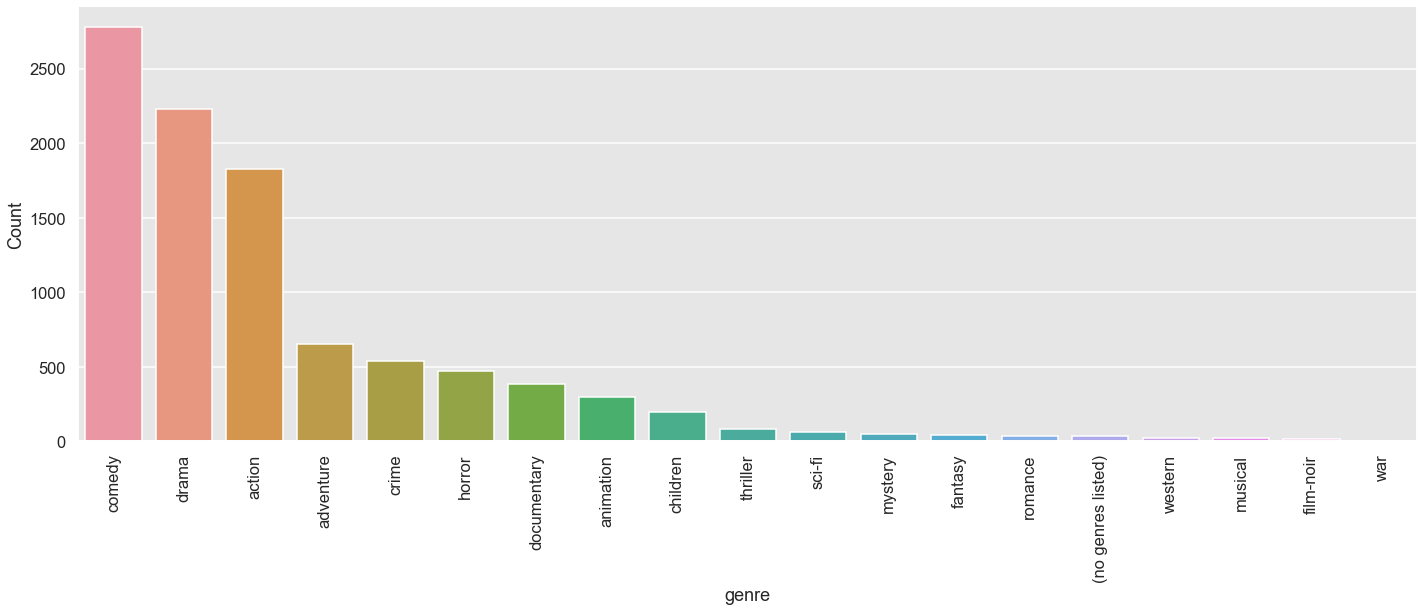

In [18]:
#Total movies in each genre
genre = movies.genre1.value_counts()
genre = pd.DataFrame(genre)
genre = genre.reset_index()
genre.rename({'index': 'genre', 'genre1':'Count'}, axis=1, inplace=True)
sns.barplot(x = genre.genre, y=genre.Count)
plt.xticks(rotation=90)
plt.show()

### 2. Total number of Movies in each Genre by Year

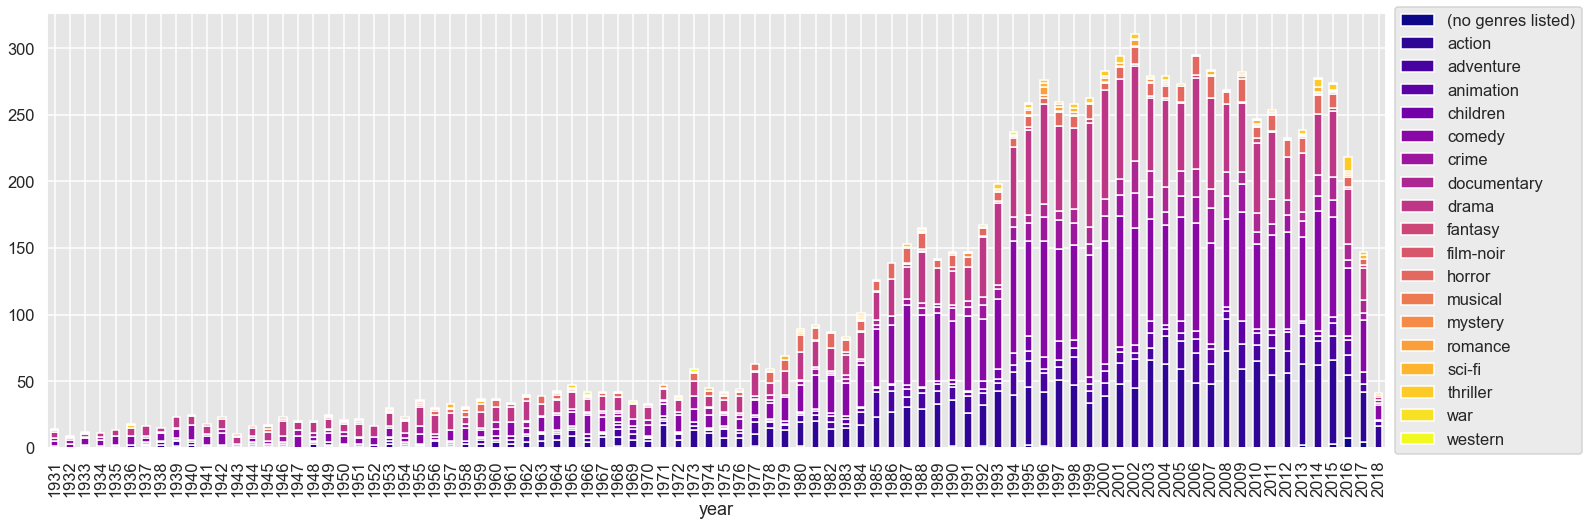

In [14]:
#Total number of movies in each genre by years
genre_by_year = movies.groupby(['year', 'genre1'])['title'].count().reset_index()
genre_by_year  = pd.DataFrame(genre_by_year)
#genre_by_year.shape
genre_by_year1 = genre_by_year[genre_by_year['year']>=1931]
#genre_by_year1.shape
sns.set(rc={'figure.figsize':(24, 8)})
sns.set_context("talk")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

df_pivot = pd.pivot_table(genre_by_year1, index='year', columns='genre1', values='title')
df_pivot.plot.bar(stacked=True, colormap='plasma')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### 3. Total number of Movies in each Genre by a specific Year

Please enter a year 2018


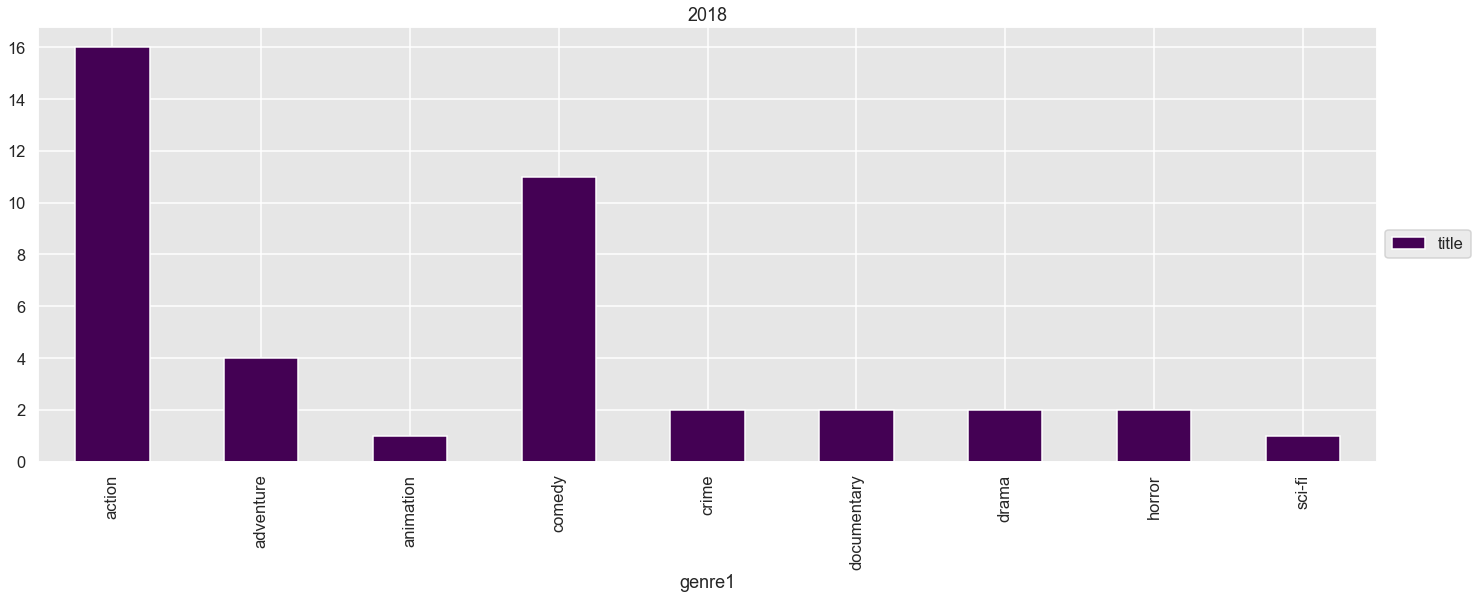

In [15]:
year1=int(input("Please enter a year "))
genre_by_year1 = genre_by_year[genre_by_year['year']==year1]

sns.set(rc={'figure.figsize':(24, 8)})
sns.set_context("talk")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

df_pivot = pd.pivot_table(genre_by_year1, index='genre1',  values='title')
df_pivot.plot.bar(stacked=True, colormap='viridis' ,title=year1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### 4. Distribution Plot of the Year column in the Movies Dataframe

C:\Users\hafid\anaconda33\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot of Movie Release Year')

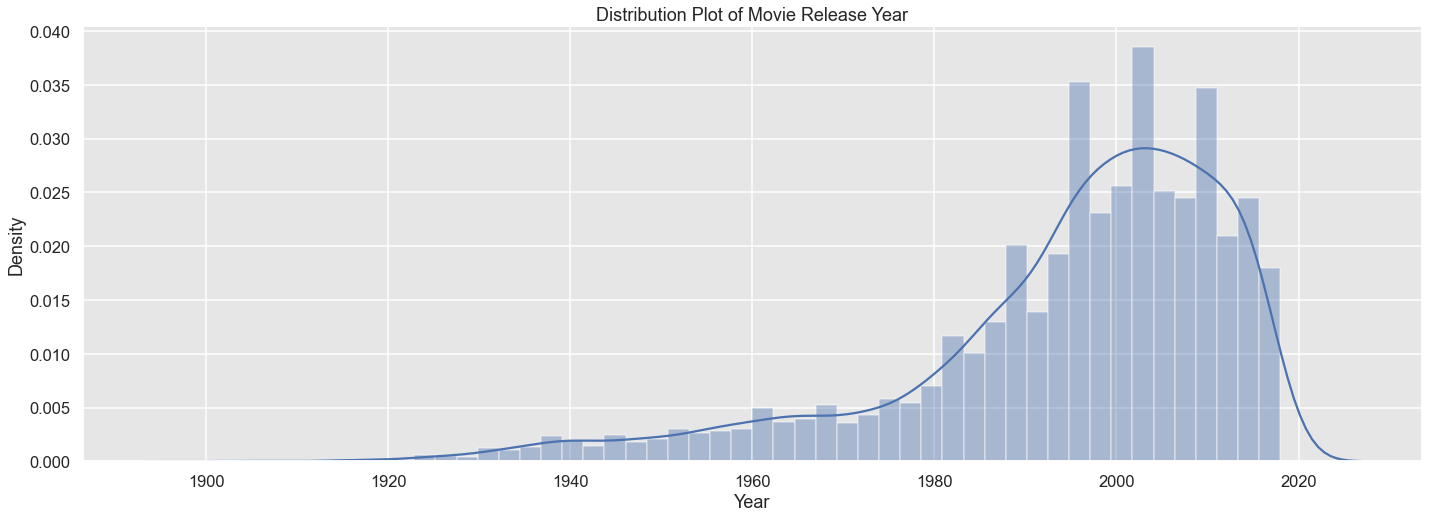

In [19]:
# Removing the rows that have year value equal to 0
df_movies_filtered = movies[movies['year'] != 0]

# Distribution plot of the year column in the movies dataframe
sns.distplot(df_movies_filtered['year'])
plt.xlabel("Year")
plt.title("Distribution Plot of Movie Release Year")

<h1 style='background:#6EA5C4;padding-top:1px; border:0; color:white'><center>ratings</center></h1> 

### 1. Distribution Plot of the Rating column in the Ratings Dataframe

C:\Users\hafid\anaconda33\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot of Ratings')

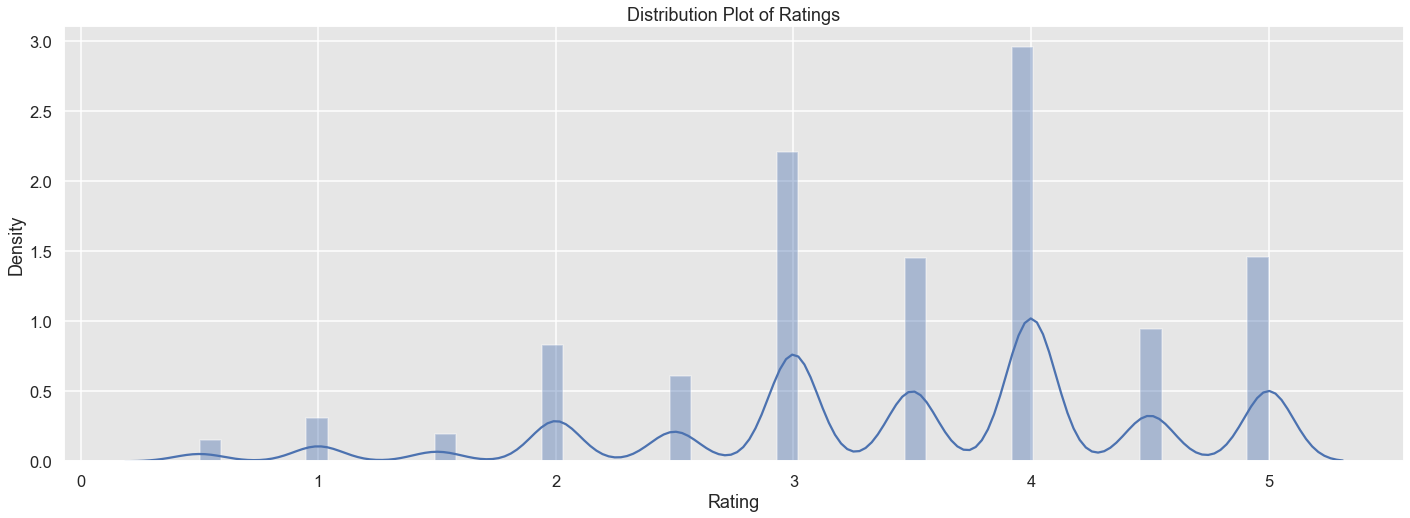

In [20]:
# Distribution plot of the rating column in the ratings dataframe
sns.distplot(ratings['rating'])
plt.xlabel("Rating")
plt.title("Distribution Plot of Ratings")

### 2. Histogram of the Rating column in the Ratings Dataframe

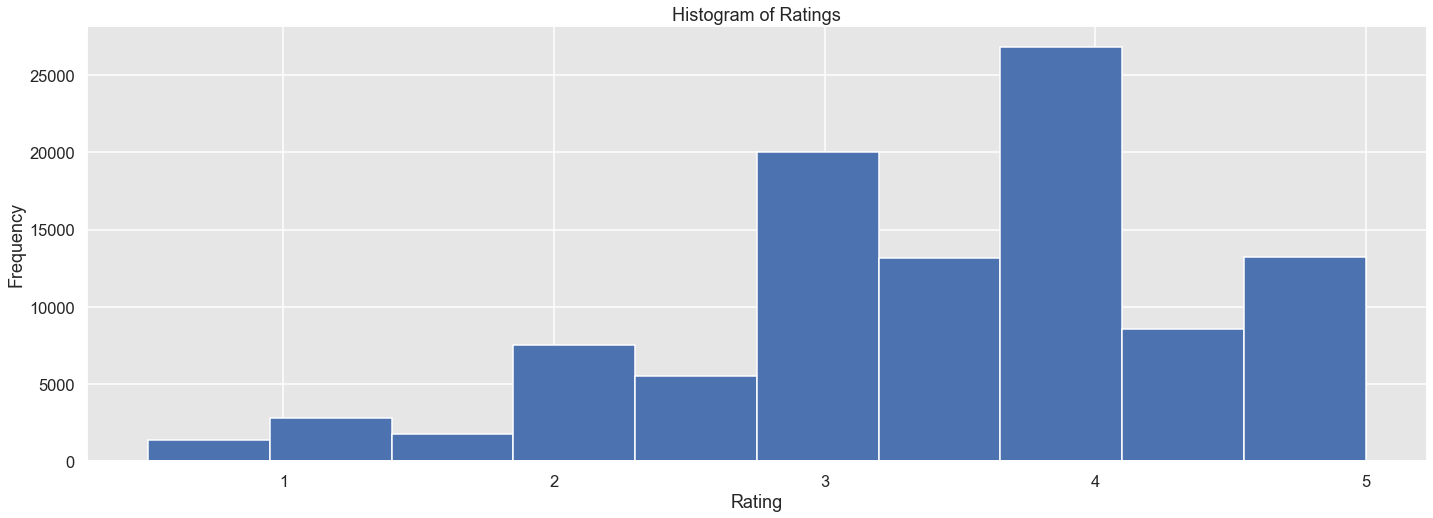

In [21]:
# Histogram of the rating column in the ratings dataframe
plt.hist(ratings['rating'], bins=10)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Histogram of Ratings")
plt.show()

### 3. Average Rating in each Genre

<AxesSubplot:xlabel='rating', ylabel='genre1'>

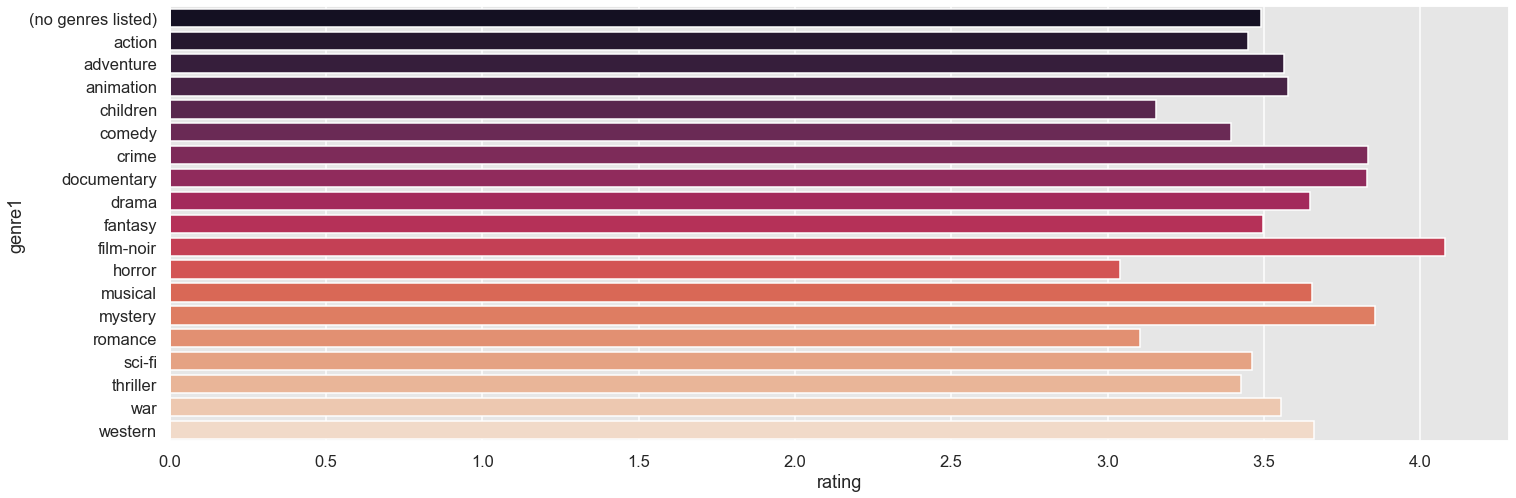

In [22]:
# average rating in each genre
test_rating=movies
test_rating =test_rating.join(ratings.set_index('movieId'), on='movieId')
test_avg = test_rating.groupby('genre1')['rating'].mean().reset_index()
test_avg = pd.DataFrame(test_avg)
sns.barplot(x='rating', y='genre1', data=test_avg , palette="rocket")

### 4. Box Plot of the Ratings Data

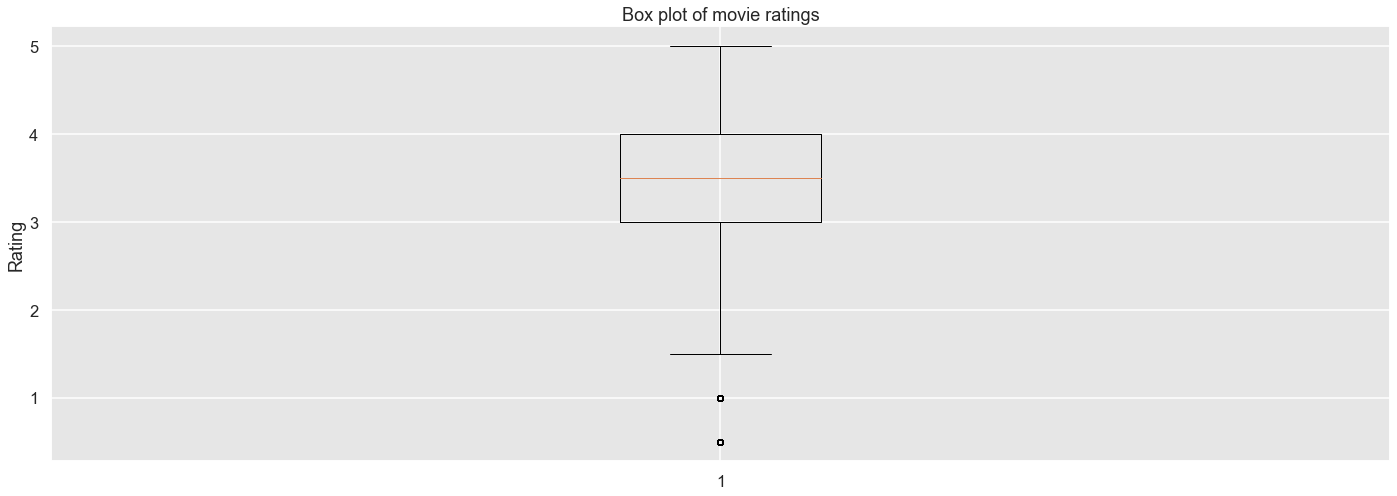

In [23]:
# Create a box plot of the ratings data
plt.boxplot(ratings["rating"])
plt.ylabel("Rating")
plt.title("Box plot of movie ratings")
plt.show()

### 5. Relationship between the number of Ratings and the average of Ratings

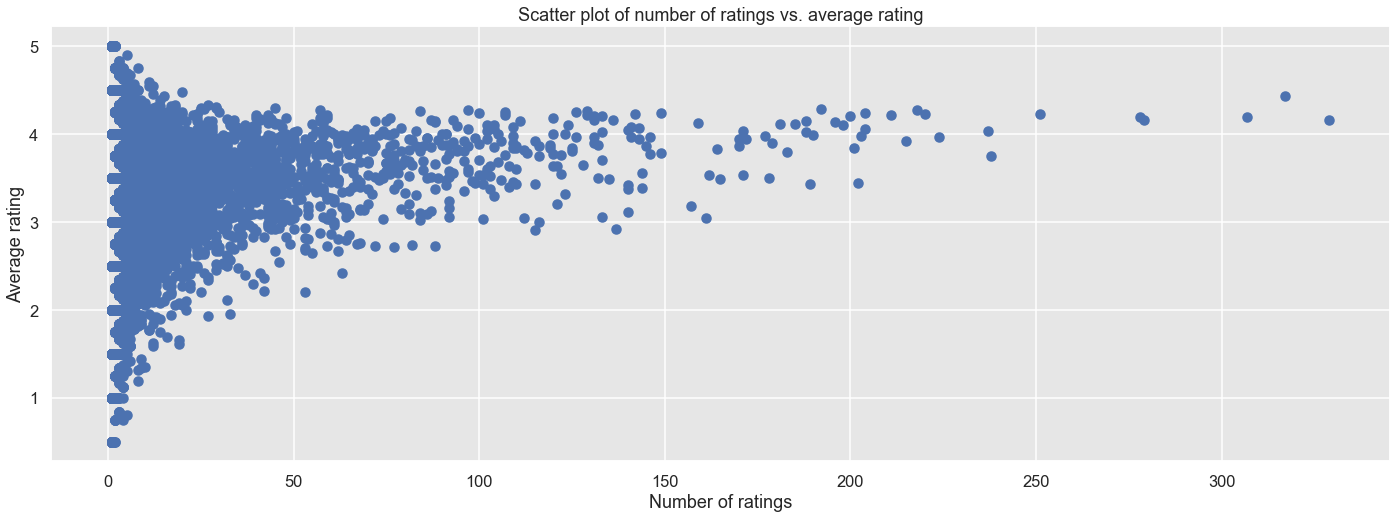

In [24]:
# Create a scatter plot of the relationship between the number of ratings and the average rating
merged_df = pd.merge(ratings, movies, on='movieId')
grouped_df = merged_df.groupby(['movieId']).agg({'rating':'mean','userId':'count'}).rename(columns={'rating':'avg_rating','userId':'num_ratings'})
plt.scatter(grouped_df['num_ratings'], grouped_df['avg_rating'])
plt.xlabel("Number of ratings")
plt.ylabel("Average rating")
plt.title("Scatter plot of number of ratings vs. average rating")
plt.show()

### 6. Average Rating in each Year

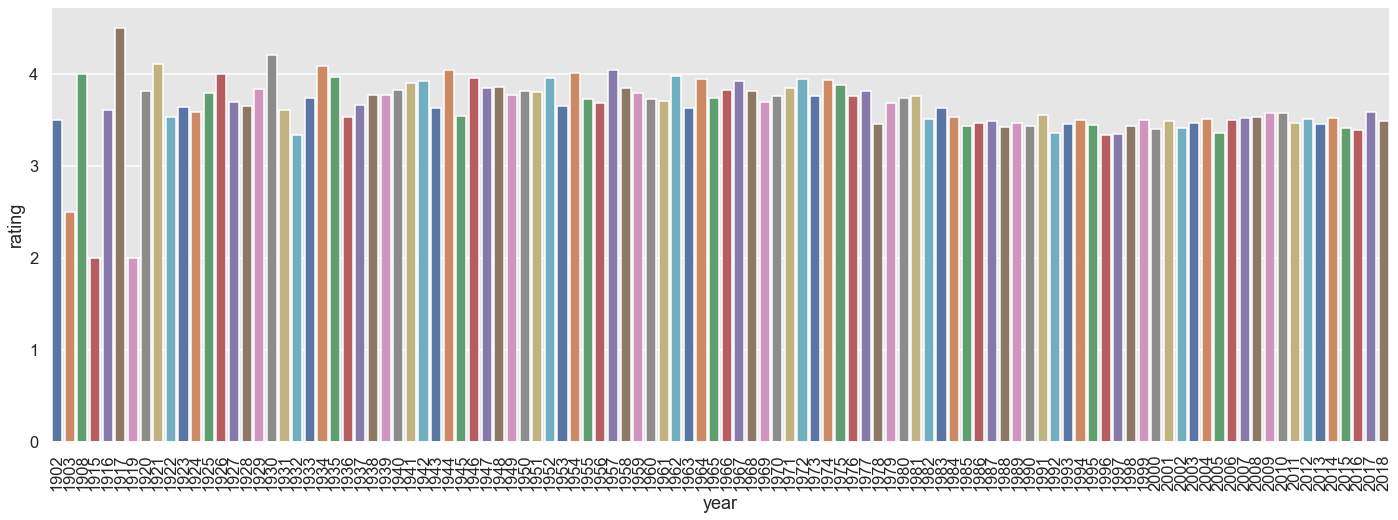

In [25]:
# Average rating in each year
# Removing the rows that have year value equal to 0
rat_y=movies[movies['year'] != 0]
rat_y =rat_y.join(ratings.set_index('movieId'), on='movieId')
test_avg = rat_y.groupby('year')['rating'].mean().reset_index()
test_avg = pd.DataFrame(test_avg)
sns.barplot(x='year', y='rating', data=test_avg ,palette="deep")
plt.xticks(rotation=90)
plt.show()

<h1 style='background:#6EA5C4;padding-top:1px; border:0; color:white'><center>tags</center></h1> 

### 1. Word Cloud of the most commonly used Tags

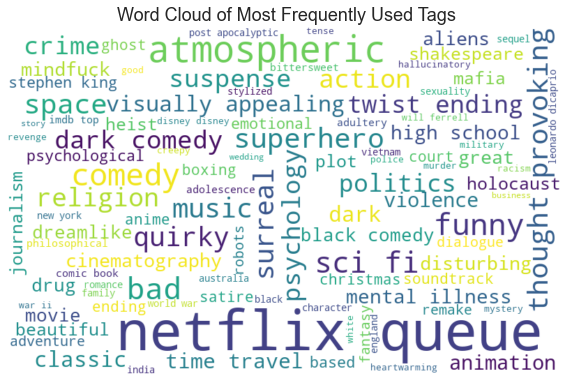

In [26]:
# Create a list of all tags
t = tags['tag'].tolist()

# Create a word cloud object
wordcloud = WordCloud(width=800, height=500, max_words=100, background_color='white').generate(' '.join(t))

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Most Frequently Used Tags")
plt.show()

### 2. Sum of Tags in each Genre

<AxesSubplot:xlabel='tag', ylabel='genre1'>

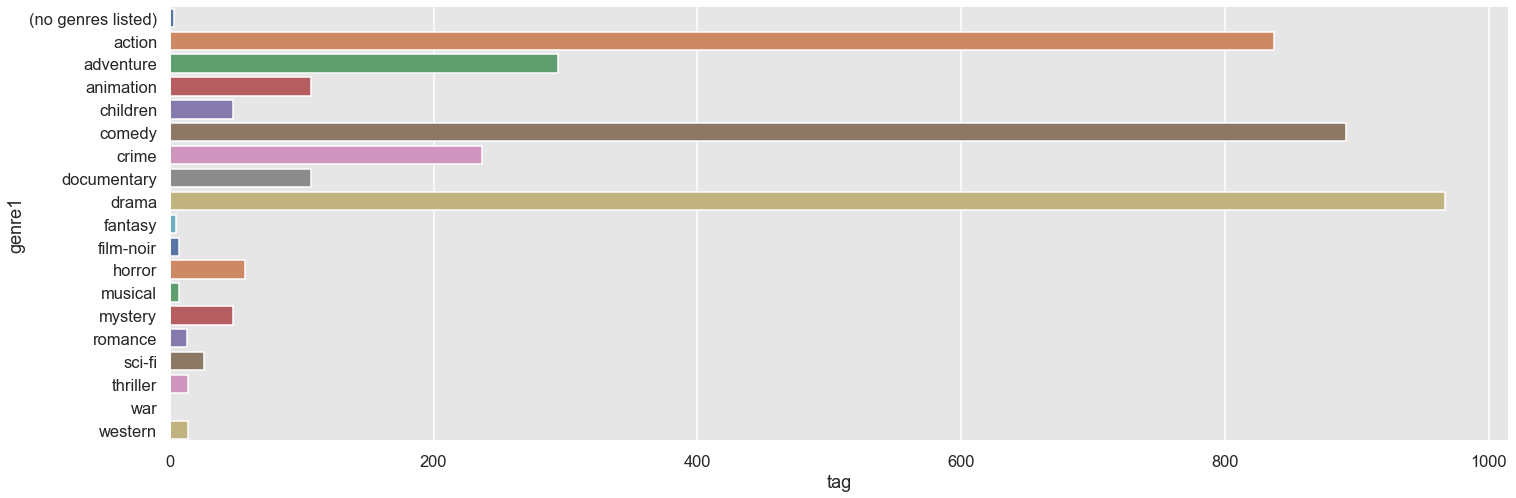

In [27]:
#sum of tags in each genre
test_tag=movies
test_tag =test_tag.join(tags.set_index('movieId'), on='movieId')
test_avg = test_tag.groupby('genre1')['tag'].count().reset_index()
test_avg = pd.DataFrame(test_avg)
sns.barplot(x='tag', y='genre1', data=test_avg ,palette="deep")

### 3. Sum of Tags in each Year

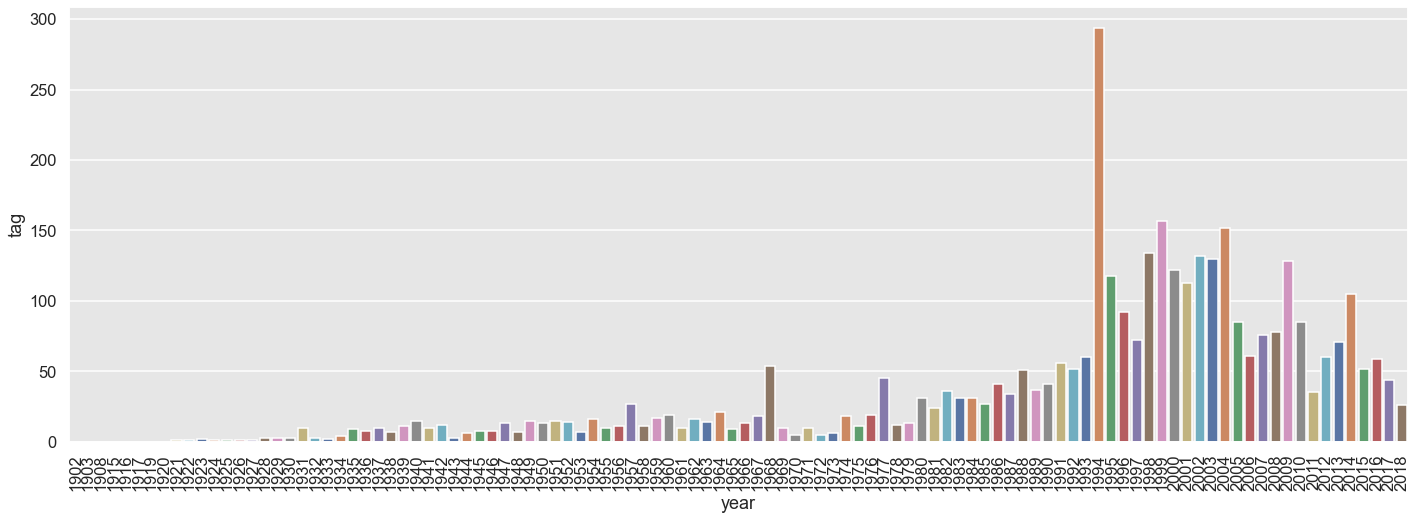

In [28]:
#Sum of tags in each year
tag_y=movies[movies['year'] != 0]
tag_y =tag_y.join(tags.set_index('movieId'), on='movieId')
test_avg = tag_y.groupby('year')['tag'].count().reset_index()
test_avg = pd.DataFrame(test_avg)
sns.barplot(x='year', y='tag', data=test_avg ,palette="deep")
plt.xticks(rotation=90)
plt.show()